In [1]:
print("___________              .__                        ")
print("\_   _____/__  _________ |  |   ___________   ____  ")
print(" |    __)_\  \/  /\____ \|  |  /  _ \_  __ \_/ __ \ ")
print(" |        \>    < |  |_> >  |_(  <_> )  | \/\  ___/ ")
print("/_______  /__/\_ \|   __/|____/\____/|__|    \___  >")
print("        \/      \/|__|                           \/ ")


___________              .__                        
\_   _____/__  _________ |  |   ___________   ____  
 |    __)_\  \/  /\____ \|  |  /  _ \_  __ \_/ __ \ 
 |        \>    < |  |_> >  |_(  <_> )  | \/\  ___/ 
/_______  /__/\_ \|   __/|____/\____/|__|    \___  >
        \/      \/|__|                           \/ 


In [1]:
print("___________.__                                      ")
print("\__    ___/|  |__   ____                            ")
print("  |    |   |  |  \_/ __ \                           ")
print("  |    |   |   Y  \  ___/                           ")
print("  |____|   |___|  /\___  >                          ")
print("                \/     \/                           ")


___________.__                                      
\__    ___/|  |__   ____                            
  |    |   |  |  \_/ __ \                           
  |    |   |   Y  \  ___/                           
  |____|   |___|  /\___  >                          
                \/     \/                           


In [2]:
print("   _____                __           __             ")
print("  /     \ _____ _______|  | __ _____/  |_  ______   ")
print(" /  \ /  \\__  \\_  __ \  |/ // __ \   __\/  ___/   ")
print("/    Y    \/ __ \|  | \/    <\  ___/|  |  \___ \    ")
print("\____|__  (____  /__|  |__|_ \\___  >__| /____  >   ")
print("        \/     \/           \/    \/          \/    ")

   _____                __           __             
  /     \ _____ _______|  | __ _____/  |_  ______   
 /  \ /  \__  \_  __ \  |/ // __ \   __\/  ___/   
/    Y    \/ __ \|  | \/    <\  ___/|  |  \___ \    
\____|__  (____  /__|  |__|_ \___  >__| /____  >   
        \/     \/           \/    \/          \/    


In [3]:
user = input("First off what is your username:")
password = input("and the password it is paired with:")
#user = 'explorer'
#password = 's0j0urn3r'

First off what is your username:explorer
and the password it is paired with:s0j0urn3r


In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import sys, os, glob, re, time
import numpy as np
import csv
from collections import Counter
import pickle
import gc
import datetime
import pandas as pd
import webbrowser
from networkx.algorithms import community as newComms
# import numpy as np
# import networkx as nx
import matplotlib.pyplot as plt
import datetime
from datetime import date, timedelta
from dateutil import parser
# import keras
# import time
# from keras.models import Sequential
# from keras.layers import Activation, Dense, Flatten
# from keras.layers import LSTM
# from keras.layers import Dropout
import psycopg2
from sshtunnel import SSHTunnelForwarder
import community
def shrinkData(df):
    df_int = df.select_dtypes(include=['int'])
    df_int = df_int.apply(pd.to_numeric,downcast='unsigned')
    df_float = df.select_dtypes(include=['float'])
    df_float = df_float.apply(pd.to_numeric,downcast='float')
    df['date'] = pd.to_datetime(df['date'])
    cols = df.columns[df.dtypes.eq(object)]
    df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=0)
    return df

def query_to_DataFrame(sqlString, user=user, password=password):
    with SSHTunnelForwarder(
        ('24.228.50.99', 443),
        #ssh_private_key="</path/to/private/ssh/key>",
        ### in my case, I used a password instead of a private key
        ssh_username="root",
        ssh_password="b3110cFr13nd", 
        remote_bind_address=('localhost', 5432)) as server:

        server.start()
#         print("server connected")
#         print(".", end=" ")

        params = {
         'database': 'Prices',
         'user': user,
         'password': password,
         'host': 'localhost',
         'port': server.local_bind_port
         }
#         print(user)
#         print(password)
#         print(params)
        try:
            conn = psycopg2.connect(**params)
#             curs = conn.cursor()
#         print("database connected")
#         print(".", end=" ")
        # Get a database cursor
            cur = conn.cursor()
        except:
            print("You are not an authorized user")
            exit()
        # Execute SQL
        cur.execute(sqlString)
    #     colnames = [desc.name for desc in curs.description] 
#         print("description is :", cur.description)
        # Get the result
        result = cur.fetchall()
        colnames = [desc[0] for desc in cur.description]
        frame = shrinkData(pd.DataFrame(result, columns=colnames))
    #     print(result)

        # Close connections
        conn.close()

        # Stop the tunnel
        server.stop()
        return frame
def Raw_query_to_DataFrame(sqlString, user=user, password=password):
    with SSHTunnelForwarder(
        ('67.240.57.228', 22),
        #ssh_private_key="</path/to/private/ssh/key>",
        ### in my case, I used a password instead of a private key
        ssh_username="root",
        ssh_password="b3110cFr13nd", 
        remote_bind_address=('localhost', 5432)) as server:

        server.start()
#         print("server connected")
#         print(".", end=" ")

        params = {
         'database': 'Prices',
         'user': user,
         'password': password,
         'host': 'localhost',
         'port': server.local_bind_port
         }
#         print(user)
#         print(password)
#         print(params)
        try:
            conn = psycopg2.connect(**params)
#             curs = conn.cursor()
#         print("database connected")
#         print(".", end=" ")
        # Get a database cursor
            cur = conn.cursor()
        except:
            print("You are not an authorized user")
            exit()
        # Execute SQL
        cur.execute(sqlString)
    #     colnames = [desc.name for desc in curs.description] 
#         print("description is :", cur.description)
        # Get the result
        result = cur.fetchall()
        colnames = [desc[0] for desc in cur.description]
        frame = pd.DataFrame(result, columns=colnames)
    #     print(result)

        # Close connections
        conn.close()

        # Stop the tunnel
        server.stop()
        return frame
    
def new_user():
    user = input("What new username do you want:")
    password = input("and the password to pair it with:")
    
    with SSHTunnelForwarder(
        ('67.240.57.228', 22),
        #ssh_private_key="</path/to/private/ssh/key>",
        ### in my case, I used a password instead of a private key
        ssh_username="root",
        ssh_password="b3110cFr13nd", 
        remote_bind_address=('localhost', 5432)) as server:

        server.start()
#         print("server connected")
#         print(".", end=" ")

        params = {
         'database': 'Prices',
         'user': 'root',
         'password': '666pounder',
         'host': 'localhost',
         'port': server.local_bind_port
         }
        try:
            conn = psycopg2.connect(**params)
#             curs = conn.cursor()
#         print("database connected")
#         print(".", end=" ")
        # Get a database cursor
            cur = conn.cursor()
        except:
            print("Cannot edit roles at this time")
            exit()
        # Execute SQL
#         sqlString = "DROP USER "+user+";"
#         cur.execute(sqlString)
        sqlString = "CREATE USER "+user+" WITH PASSWORD \'"+password+"\';"
        cur.execute(sqlString)
        sqlString = "GRANT CONNECT ON DATABASE \"Prices\" TO "+user+";"
        cur.execute(sqlString)

#         sqlString = "GRANT SELECT ON ALL TABLES IN SCHEMA Prices TO "+user+";"
#         cur.execute(sqlString)
        sqlString = "GRANT USAGE ON SCHEMA Prices TO "+user+";"
        cur.execute(sqlString)
        sqlString = "GRANT SELECT ON ALL TABLES IN SCHEMA Prices TO "+user+";"
        cur.execute(sqlString)
        cur.execute("COMMIT;")
    #     colnames = [desc.name for desc in curs.description] 
#         print("description is :", cur.description)
        # Get the result
#         result = cur.fetchall()
#         colnames = [desc[0] for desc in cur.description]
#         frame = shrinkData(pd.DataFrame(result, columns=colnames))
    #     print(result)

        # Close connections
        conn.close()

        # Stop the tunnel
        server.stop()
        return 1
    
def merge_data(a, b, from_date='2018-01-01'):
    """
    a: first DataFrame
    b: second DataFrame
    from_date: includes the data from the provided date and drops the any data before that date.
    returns merged data as Pandas DataFrame
    """
    merged_data = pd.merge(a, b, on=['Date'])
    merged_data = merged_data[merged_data['Date'] >= from_date]
    print("Merged")
    return merged_data
# reads tsv edge list where each line is in the format "leftnode rightnode"
# assumes file header contains 'sym' for undirected graph and 'asym' for directed graphs
def convert_tsv_to_graphml(filename):
    m = re.search("(.*)\.tsv", filename)
    name = m.group(1)
    file = open(filename, 'rb')
    header = file.readline()
    print(header)
    if b"asym" in header:
        graph_type = nx.DiGraph()
    else:
        graph_type = nx.Graph()
    lines = [line for line in file if not line.startswith(b"%")]
    print(lines[0], lines[1],"\n")
    g = nx.read_edgelist(lines, create_using=graph_type)
    nx.write_graphml(g, name+".graphml")  
    print(filename)
    return g

def distribution(counts, attribute):
    vals, cnt = zip(*counts.items())
    
    # get rid of all negative values by bumping everything up
    if (np.array(vals) < 0).any():
        print(attribute + " had negative values but is shifted up by {} now".format(-min(vals) + 1))
        vals = np.array(vals) - min(vals) + 1
        
    if 0 in np.array(vals):
        vals = np.array(vals) + 1   # account for possible 0 values for log plot
        print(attribute + " has been shifted up by 1")
        
    fig, ax = plt.subplots()
    plt.scatter(vals, cnt, color='b')
    
    plt.title(attribute + " Plot")
    plt.ylabel("Count")
    plt.xlabel(attribute)
    plt.yscale('log')
    # clustering coefficient only has log plot, not log log
    if attribute == "Clustering Coefficient":
        plt.xscale('linear')
        log_vals = np.log10(vals)
    else:
        plt.xscale('log')
        log_vals = np.log10(vals)
    
    #deg = np.log10(np.array(deg))
    #cnt = np.log10(np.array(cnt))
    vals = np.array(vals)
    cnt = np.array(cnt)
    log_vals = np.log10(vals)
    log_cnt = np.log10(cnt)
    
    m, b = np.polyfit(log_vals, log_cnt, 1)
    y_fit = np.power(10, m*log_vals + b)
    #plt.plot(deg, cnt, '.')
    plt.plot(vals, y_fit , '-')
    
# This will read in the correlation TSV file and create the graphML file to disk
def make_currency_graph(filename, name):
    corr = np.genfromtxt(fname=filename, delimiter='\t',dtype=float, names=True)    # fname="correlations.tsv"
    corrGraph = nx.Graph()
    names = corr.dtype.names
    
    for i in range(len(corr)):
        l_node = names[i]
        l_type = l_node.split("_")[-1]
        l_name = l_node.split("_")[0]
        
        for j in range(i + 1, len(corr)):
            r_node = names[j]
            
            if i == 0:
                r_type = r_node.split("_")[-1]
                r_name = r_node.split("_")[0]
                corrGraph.add_node(l_node, position=l_type, name = l_name)
                corrGraph.add_node(r_node, position=r_type, name = r_name)
                
            corrGraph.add_edge(l_node, r_node, weight = float(corr[i][j]))
    
    corrGraph.name = name
    corrGraph = nx.maximum_spanning_tree(corrGraph)
    nx.write_graphml(corrGraph, corrGraph.name + ".graphml")

    return corrGraph

def createGraphFiles(filename, name):
    graphs = []
    g = make_currency_graph(filename, name)
    print("Creating graphml file for", g.name)
    print("Graph name is", g.name)

    # Create or retrieve Erdos-Renyi random graph
    if not os.path.exists(g.name + "_ER.graphml"):
        print("Creating ER graph for " + g.name + " from scratch")
        k = 2 * g.number_of_edges() / g.number_of_nodes()   # average degree

 
        print("For currencies, use weighted degree for ER")
        edges_dict = g.edges()
        k = sum([edges_dict[edge]["weight"] for edge in edges_dict]) * 2 / g.number_of_nodes()

        p = k / (g.number_of_nodes() - 1)                  # probability = avg deg / # of possible neighbors (n-1)
        g_ER = nx.generators.erdos_renyi_graph(g.number_of_nodes(), p)
        nx.write_graphml(g_ER, g.name+"_ER.graphml")
    else:
        print("Reading in the ER graphml file for " + g.name)
        g_ER = nx.read_graphml(g.name+"_ER.graphml")
    g_ER.name = g.name + "_ER"

    # Create or retrieve Barabasi-Albert scale-free network
    if not os.path.exists(g.name + "_BA.graphml"):
        print("Creating BA graph for " + g.name + " from scratch")
        m = 1
        n = g.number_of_nodes()
        g_BA = nx.generators.barabasi_albert_graph(n, m)
        old_dist = abs(g.number_of_edges() - g_BA.number_of_edges())

        # increment m until it generates the BA graph closest to real graph also make sure m never equals n
        while g_BA.number_of_edges() < g.number_of_edges() and m + 1 < n:
            m += 1
            old_dist = abs(g.number_of_edges() - g_BA.number_of_edges())
            g_BA = nx.generators.barabasi_albert_graph(n, m)

        # See how close our graph is to the original and decrement m by 1 if we've gone too far    
        dist = abs(g_BA.number_of_edges() - g.number_of_edges())
        if old_dist < dist:
            g_BA = nx.generators.barabasi_albert_graph(n, m - 1)
            print("Use previous m value:", m - 1)
        else:
            print("Use current m value:", m)

        nx.write_graphml(g_BA, g.name + "_BA.graphml")
    else:
        print("Reading in the BA graphml file for " + g.name)
        g_BA = nx.read_graphml(g.name+"_BA.graphml")
    g_BA.name = g.name + "_BA"    

    graphs += [g, g_ER, g_BA]
    return graphs

def analyzeGraphs(graphs):
    # Now loop through all of our graphs
    i = 1
    for g in graphs:

        graph_name = g.name

        # if we haven't generated the CSV files yet, cut the program off and prompt the user to do so
        if not os.path.exists(graph_name + ".csv"):
            print("We are missing the CSV file of statistics '{}'".format(graph_name + ".csv"))
            print("Now run Gephi statistics on the created GraphML files and export as CSV, then rerun this program")
            continue

        print("\nReading the graph metrics from '" + graph_name + "'.csv")

        statFilCSV = open(graph_name + ".csv", 'r')
        headFile = open(graph_name + ".csv", 'r')
        header = next(csv.reader(headFile))
        headFile.close()

        reader = csv.DictReader(statFilCSV)
        network_stats = {attribute: [] for attribute in header}
        counters = {}

        # Get raw network statistics from CSV Gephi output
        for row in reader:
            Id, label, timeset, eccentricity, closnesscentrality, harmonicclosnesscentrality, betweenesscentrality, componentnumber, degree, clustering, triangles, eigencentrality, weightedDegree \
            = row["Id"], row["Label"],	row["timeset"],	int(row["Eccentricity"]),	float(row["closnesscentrality"]),	float(row["harmonicclosnesscentrality"]),	float(row["betweenesscentrality"]),	int(row["componentnumber"]),	int(row["Degree"]),	float(row["clustering"]),	int(row["triangles"]),	float(row["eigencentrality"]),	float(row["Weighted Degree"])
            network_stats["clustering"].append(clustering)
            network_stats["betweenesscentrality"].append(betweenesscentrality)
            network_stats["Degree"].append(degree)
            network_stats["closnesscentrality"].append(closnesscentrality)
            network_stats["componentnumber"].append(componentnumber)
            network_stats["Weighted Degree"].append(weightedDegree)

        # Get distribution of network statistics
        counters["Degree"] = Counter(sorted(network_stats["Degree"]))
        counters["clustering"] = Counter(sorted(network_stats["clustering"]))
        counters["betweenesscentrality"] = Counter(sorted(network_stats["betweenesscentrality"]))
        counters["closnesscentrality"] = Counter(sorted(network_stats["closnesscentrality"]))
        counters["componentnumber"] = Counter(sorted(network_stats["componentnumber"]))
        counters["Weighted Degree"] = Counter(sorted(network_stats["Weighted Degree"]))

        components = nx.connected_component_subgraphs(g)
        components = sorted(components, key=len, reverse=True)
        network_stats["componentsize"] = [len(comp) for comp in components]
        cc = Counter(network_stats["componentsize"])
        gc = components[0]
        print("Size of largest connected component:", len(gc))
        counters["componentsize"] = cc

        plt.figure(i)
        i += 1

        distribution(counters["Degree"], "Degree")
        plt.suptitle(graph_name)
        if not os.path.exists(graph_name+"-Degree.png"):
            plt.savefig(graph_name+"-Degree.png")
            print("Saving {}-Degree.png".format(graph_name))

        if "currencyCorrelations" in graph_name:
            distribution(counters["Weighted Degree"], "Weighted Degree")
            plt.suptitle(graph_name)
            if not os.path.exists(graph_name+"-WeightedDegree.png"):
                plt.savefig(graph_name+"-WeightedDegree.png")
                print("Saving {}-WeightedDegree.png".format(graph_name))

        if len(set(network_stats["clustering"])) > 1:
            distribution(counters["clustering"], "Clustering Coefficient")
            plt.suptitle(graph_name)
            if not os.path.exists(graph_name+"-ClusteringCoefficient.png"):
                plt.savefig(graph_name+"-ClusteringCoefficient.png")
                print("Saving {}-ClusteringCoefficient.png".format(graph_name))

        if len(set(network_stats["betweenesscentrality"])) > 1:
            distribution(counters["betweenesscentrality"], "Betweeness Centrality")
            plt.suptitle(graph_name)
            if not os.path.exists(graph_name+"-BetweenessCentrality.png"):
                plt.savefig(graph_name+"-BetweenessCentrality.png")
                print("Saving {}-BetweenessCentrality.png".format(graph_name))

        if len(set(network_stats["componentnumber"])) > 1:
            distribution(counters["componentsize"], "Connected Components Size")
            plt.suptitle(graph_name)
            if not os.path.exists(graph_name+"-ConnectedComponents.png"):
                plt.savefig(graph_name+"-ConnectedComponents.png")
                print("Saving {}-ConnectedComponents.png".format(graph_name))

        plt.show()

        print("\nAverage Values:")
        print("\tAverage Degree: {} weighted, {} unweighted".format(np.mean(network_stats["Degree"]), np.mean(network_stats["Weighted Degree"])))
        print("\tAverage Clustering Coefficient:", np.mean(network_stats["clustering"]))
        print("\tAverage Betweeness Centrality:", np.mean(network_stats["betweenesscentrality"]))
        print("\tAverage Connected Components Size:", np.mean(network_stats["componentsize"]))     # since there's only one connected component, average is # of nodes

        print("\nVariance of Values:")
        print("\tVariance of Degree: {} weighted, {} unweighted".format(np.var(network_stats["Degree"]), np.var(network_stats["Weighted Degree"])))
        print("\tVariance of Clustering Coefficient:", np.var(network_stats["clustering"]))
        print("\tVariance of Betweeness Centrality:", np.var(network_stats["betweenesscentrality"]))
        print("\tVariance of Connected Components Size:", np.var(network_stats["componentsize"]))     # since there's only one connected component, variance is 0


        print("Average Closeness Centrality:", np.mean(network_stats["closnesscentrality"]))
        statFilCSV.close()
        
##### This function draws an induced graph
def draw_induced_graph(G, part):
    g = G
    ind = community.induced_graph(part, g)
    values = [part.get(node) for node in G.nodes()]
    plt.figure(figsize=(25,25))
    nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=200, with_labels=True)

def graphinate(dataframe, name):
    correlations = dataframe.corr()
    correlations.to_csv('correlations.tsv', sep='\t', encoding='utf-8', index=False)
    G = make_currency_graph('correlations.tsv', name)
    return G

def get_market_data(market, tag=True):
    market_data = pd.read_html("https://coinmarketcap.com/currencies/" + market + 
        "/historical-data/?start=20180101&end="+time.strftime("%Y%m%d"), flavor='html5lib')[0]
    market_data = market_data.rename(columns={'Date':'date'})
    market_data = market_data.assign(Date=pd.to_datetime(market_data['date']))
    market_data['Volume'] = (pd.to_numeric(market_data['Volume'], errors='coerce').fillna(0))
    if tag:
        market_data.columns = [market_data.columns[0]] + [tag + '_' + i for i in market_data.columns[1:]]
    return market_data

def convert_tuple(tuple_partition):
    retDict = dict()
    for node in tuple_partition[0]:
        retDict.update({node:0})
    for node in tuple_partition[1]:
        retDict.update({node:1})
    return retDict

def convert_sort(sorted_list):
    retDict = dict()
    for i in range(0,len(sorted_list)):
        for name in sorted_list[i]:
            retDict.update({name:i})
    return retDict


In [11]:
def getDate():
    date_entry = input('Enter a date in YYYY-MM-DD format: ')
    early = datetime.date(2018,1,1)
    try:
        year, month, day = map(int, date_entry.split('-'))
        fromWhen = datetime.date(year, month, day)
        if fromWhen < early:
            print("We may not have data going back that far...")
            date_entry = '2018-01-01'
    except:
        print("We may not have data going back that far...")
        date_entry = '2018-01-01'

    return date_entry
date_entry = getDate()

Enter a date in YYYY-MM-DD format: 2018-01-01


In [12]:

#### This Cell pulls in the data from the database
aggregateQuery = "SELECT * FROM Prices.aggregates WHERE date >= \'"+date_entry+"\';"
aggregateframe = query_to_DataFrame(aggregateQuery)

indexes = ['GSPC', 'DJI', 'IXIC', 'NYA', 'XAX', 'BUK100P', 'RUT', 'VIX', 'GDAXI', 'FCHI', 'STOXX50E', 'N100', 'BFX', 'HSI', 'AXJO', 'JKSE', 'NZ50', 'KS11', 'TWII', 'GSPTSE', 'BVSP', 'MXX', 'IPSA', 'MERV', 'TA125TA', 'JN0UJO']
instruments = ['COPPERCMDUSD', 'GASCMDUSD', 'LIGHTCMDUSD', 'BRENTCMDUSD', 'DIESELCMDUSD', 'XAUUSD', 'XAGUSD', 'GBPUSD', 'NZDUSD', 'USDCAD', 'USDJPY', 'USDCHF', 'USDCAD', 'GBPUSD', 'EURUSD', 'AUDUSD', 'XAGUSD', 'XAUUSD', 'DIESELCMDUSD', 'BRENTCMDUSD', 'LIGHTCMDUSD', 'GASCMDUSD', 'AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'AUDSGD', 'CADCHF', 'CADHKD', 'CADJPY', 'CHFJPY', 'CHFSGD', 'EURAUD', 'EURCAD', 'EURCHF', 'EURCZK', 'EURDKK', 'EURGBP', 'EURHKD', 'EURHUF', 'EURJPY', 'EURNOK', 'EURNZD', 'EURPLN', 'EURRUB', 'EURSEK', 'EURSGD', 'EURTRY', 'GBPAUD', 'GBPCAD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'HKDJPY', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'SGDJPY', 'TRYJPY', 'USDCNH', 'USDCZK', 'USDDKK', 'USDHUF', 'USDILS', 'USDMXN', 'USDNOK', 'USDPLN', 'USDRON', 'USDRUB', 'USDSEK', 'USDSGD', 'USDTHB', 'USDTRY', 'USDZAR', 'ZARJPY']
nameList = ['Dates']
instruments = list(set(instruments))
indexes = list(set(indexes))

### Separate Stocks and Currencies

indexSection = (len(indexes) * 6)+1
StockIndexes = aggregateframe

StockIndexes = StockIndexes.drop(columns=aggregateframe.columns[indexSection:])
# StockIndexes.head()

currencies = aggregateframe
currencies = currencies.drop(columns=aggregateframe.columns[1:indexSection])
# currencies.head()

## Organize Currency Data

a = currencies.columns[currencies.columns.str.endswith('avg')]
a = a.insert(0,'date')
averages = currencies[a]
# averages.head()

a = currencies.columns[currencies.columns.str.endswith('high')]
a = a.insert(0,'date')
highCurr = currencies[a]
# highCurr.head()

a = currencies.columns[currencies.columns.str.endswith('low')]
a = a.insert(0,'date')
lowCurr = currencies[a]
# lowCurr.head()

### Organize Stock Indexes

a = StockIndexes.columns[StockIndexes.columns.str.endswith('open')]
a = a.insert(0,'date')
opens = StockIndexes[a]
# opens.head()

a = StockIndexes.columns[StockIndexes.columns.str.endswith('close')]
a = a.insert(0,'date')
closes = StockIndexes[a]
# closes.head()

a = StockIndexes.columns[StockIndexes.columns.str.endswith('high')]
a = a.insert(0,'date')
highStk = StockIndexes[a]
# highStk.head()

a = StockIndexes.columns[StockIndexes.columns.str.endswith('low')]
a = a.insert(0,'date')
lowStk = StockIndexes[a]
# lowStk.head()

a = StockIndexes.columns[StockIndexes.columns.str.endswith('adjclose')]
a = a.insert(0,'date')
adjclose = StockIndexes[a]
# opens.head()

a = StockIndexes.columns[StockIndexes.columns.str.endswith('volume')]
a = a.insert(0,'date')
volumes = StockIndexes[a]
# volumes.head()

### Some Aggregates
a = aggregateframe.columns[aggregateframe.columns.str.endswith('high')]
a = a.insert(0,'date')
highAll = aggregateframe[a]
# highAll.head()

a = aggregateframe.columns[aggregateframe.columns.str.endswith('low')]
a = a.insert(0,'date')
lowAll = aggregateframe[a]
# lowAll.head()

### Get and Organize CryptoCurrency Data


cointags = [ ('bitcoin', 'BTC'), ('ripple', 'XRP'), ('ethereum', 'ETH'), ('stellar', 'XLM'), 
           ('eos', 'EOS'), ('litecoin', 'LTC'), ('tether', 'USDT'), ('cardano', 'ADA'), ('monero', 'XMR'),
            ('tron', 'TRX'), ('iota', 'MIOTA'), ('dash', 'DASH'), ('bitcoin-cash', 'BCH'), ('binance-coin','BNB')]
coinframes =[]
for tag in cointags:
#     print(tag)
#     print(".", end=" ")
    frame = shrinkData(get_market_data(tag[0],tag[1]))
    frame = frame.drop(columns=tag[1]+'_Date')
    coinframes.append(frame)
    coinframes[-1].rename(columns={tag[1]+'_Open*': tag[1]+'_Open', tag[1]+'_Close**':tag[1]+'_Close'}, inplace=True)

coins = coinframes[0]
for i in range(1, len(coinframes)):
    coins = pd.merge(coins, coinframes[i], on=['date'])


a = coins.columns[coins.columns.str.endswith('Open')]
a = a.insert(0,'date')
opensCoins = coins[a]
# opensCoins.head()

a = coins.columns[coins.columns.str.endswith('Close')]
a = a.insert(0,'date')
closesCoins = coins[a]
# closesCoins.head()

a = coins.columns[coins.columns.str.endswith('High')]
a = a.insert(0,'date')
highCoins = coins[a]
# highCoins.head()

a = coins.columns[coins.columns.str.endswith('Low')]
a = a.insert(0,'date')
lowCoins = coins[a]
# lowCoins.head()


a = coins.columns[coins.columns.str.endswith('Volume')]
a = a.insert(0,'date')
volumesCoins = coins[a]
# volumesCoins.head()

### Create Mixed Market Data Frames

all_Highs = pd.merge(highStk, highCurr, on=['date'])
all_Highs = pd.merge(all_Highs, highCoins, on=['date'])

all_Lows = pd.merge(lowStk, lowCurr, on=['date'])
all_Lows = pd.merge(all_Lows, lowCoins, on=['date'])


highKoins = pd.merge(highCoins, highCurr, on=['date'])

lowKoins = pd.merge(lowCoins, lowCurr, on=['date'])


In [ ]:
def dataOrg(date_entry):
    #### This Cell pulls in the data from the database
    aggregateQuery = "SELECT * FROM Prices.aggregates WHERE date >= \'"+date_entry+"\';"
    aggregateframe = query_to_DataFrame(aggregateQuery)

    indexes = ['GSPC', 'DJI', 'IXIC', 'NYA', 'XAX', 'BUK100P', 'RUT', 'VIX', 'GDAXI', 'FCHI', 'STOXX50E', 'N100', 'BFX', 'HSI', 'AXJO', 'JKSE', 'NZ50', 'KS11', 'TWII', 'GSPTSE', 'BVSP', 'MXX', 'IPSA', 'MERV', 'TA125TA', 'JN0UJO']
    instruments = ['COPPERCMDUSD', 'GASCMDUSD', 'LIGHTCMDUSD', 'BRENTCMDUSD', 'DIESELCMDUSD', 'XAUUSD', 'XAGUSD', 'GBPUSD', 'NZDUSD', 'USDCAD', 'USDJPY', 'USDCHF', 'USDCAD', 'GBPUSD', 'EURUSD', 'AUDUSD', 'XAGUSD', 'XAUUSD', 'DIESELCMDUSD', 'BRENTCMDUSD', 'LIGHTCMDUSD', 'GASCMDUSD', 'AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'AUDSGD', 'CADCHF', 'CADHKD', 'CADJPY', 'CHFJPY', 'CHFSGD', 'EURAUD', 'EURCAD', 'EURCHF', 'EURCZK', 'EURDKK', 'EURGBP', 'EURHKD', 'EURHUF', 'EURJPY', 'EURNOK', 'EURNZD', 'EURPLN', 'EURRUB', 'EURSEK', 'EURSGD', 'EURTRY', 'GBPAUD', 'GBPCAD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'HKDJPY', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'SGDJPY', 'TRYJPY', 'USDCNH', 'USDCZK', 'USDDKK', 'USDHUF', 'USDILS', 'USDMXN', 'USDNOK', 'USDPLN', 'USDRON', 'USDRUB', 'USDSEK', 'USDSGD', 'USDTHB', 'USDTRY', 'USDZAR', 'ZARJPY']
    nameList = ['Dates']
    instruments = list(set(instruments))
    indexes = list(set(indexes))

    ### Separate Stocks and Currencies

    indexSection = (len(indexes) * 6)+1
    StockIndexes = aggregateframe

    StockIndexes = StockIndexes.drop(columns=aggregateframe.columns[indexSection:])
    # StockIndexes.head()

    currencies = aggregateframe
    currencies = currencies.drop(columns=aggregateframe.columns[1:indexSection])
    # currencies.head()

    ## Organize Currency Data

    a = currencies.columns[currencies.columns.str.endswith('avg')]
    a = a.insert(0,'date')
    averages = currencies[a]
    # averages.head()

    a = currencies.columns[currencies.columns.str.endswith('high')]
    a = a.insert(0,'date')
    highCurr = currencies[a]
    # highCurr.head()

    a = currencies.columns[currencies.columns.str.endswith('low')]
    a = a.insert(0,'date')
    lowCurr = currencies[a]
    # lowCurr.head()

    ### Organize Stock Indexes

    a = StockIndexes.columns[StockIndexes.columns.str.endswith('open')]
    a = a.insert(0,'date')
    opens = StockIndexes[a]
    # opens.head()

    a = StockIndexes.columns[StockIndexes.columns.str.endswith('close')]
    a = a.insert(0,'date')
    closes = StockIndexes[a]
    # closes.head()

    a = StockIndexes.columns[StockIndexes.columns.str.endswith('high')]
    a = a.insert(0,'date')
    highStk = StockIndexes[a]
    # highStk.head()

    a = StockIndexes.columns[StockIndexes.columns.str.endswith('low')]
    a = a.insert(0,'date')
    lowStk = StockIndexes[a]
    # lowStk.head()

    a = StockIndexes.columns[StockIndexes.columns.str.endswith('adjclose')]
    a = a.insert(0,'date')
    adjclose = StockIndexes[a]
    # opens.head()

    a = StockIndexes.columns[StockIndexes.columns.str.endswith('volume')]
    a = a.insert(0,'date')
    volumes = StockIndexes[a]
    # volumes.head()

    ### Some Aggregates
    a = aggregateframe.columns[aggregateframe.columns.str.endswith('high')]
    a = a.insert(0,'date')
    highAll = aggregateframe[a]
    # highAll.head()

    a = aggregateframe.columns[aggregateframe.columns.str.endswith('low')]
    a = a.insert(0,'date')
    lowAll = aggregateframe[a]
    # lowAll.head()

    ### Get and Organize CryptoCurrency Data


    cointags = [ ('bitcoin', 'BTC'), ('ripple', 'XRP'), ('ethereum', 'ETH'), ('stellar', 'XLM'), 
               ('eos', 'EOS'), ('litecoin', 'LTC'), ('tether', 'USDT'), ('cardano', 'ADA'), ('monero', 'XMR'),
                ('tron', 'TRX'), ('iota', 'MIOTA'), ('dash', 'DASH'), ('bitcoin-cash', 'BCH'), ('binance-coin','BNB')]
    coinframes =[]
    for tag in cointags:
    #     print(tag)
    #     print(".", end=" ")
        frame = shrinkData(get_market_data(tag[0],tag[1]))
        frame = frame.drop(columns=tag[1]+'_Date')
        coinframes.append(frame)
        coinframes[-1].rename(columns={tag[1]+'_Open*': tag[1]+'_Open', tag[1]+'_Close**':tag[1]+'_Close'}, inplace=True)

    coins = coinframes[0]
    for i in range(1, len(coinframes)):
        coins = pd.merge(coins, coinframes[i], on=['date'])


    a = coins.columns[coins.columns.str.endswith('Open')]
    a = a.insert(0,'date')
    opensCoins = coins[a]
    # opensCoins.head()

    a = coins.columns[coins.columns.str.endswith('Close')]
    a = a.insert(0,'date')
    closesCoins = coins[a]
    # closesCoins.head()

    a = coins.columns[coins.columns.str.endswith('High')]
    a = a.insert(0,'date')
    highCoins = coins[a]
    # highCoins.head()

    a = coins.columns[coins.columns.str.endswith('Low')]
    a = a.insert(0,'date')
    lowCoins = coins[a]
    # lowCoins.head()


    a = coins.columns[coins.columns.str.endswith('Volume')]
    a = a.insert(0,'date')
    volumesCoins = coins[a]
    # volumesCoins.head()

    ### Create Mixed Market Data Frames

    all_Highs = pd.merge(highStk, highCurr, on=['date'])
    all_Highs = pd.merge(all_Highs, highCoins, on=['date'])

    all_Lows = pd.merge(lowStk, lowCurr, on=['date'])
    all_Lows = pd.merge(all_Lows, lowCoins, on=['date'])


    highKoins = pd.merge(highCoins, highCurr, on=['date'])

    lowKoins = pd.merge(lowCoins, lowCurr, on=['date'])


In [13]:
#### This cell implements the louvain algorithm
def Draw_Louvain(G):
    part = community.best_partition(G)
    values = [part.get(node) for node in G.nodes()]
    fig = plt.figure(figsize=(21,12), facecolor='g')
    edges = G.edges()
    weights = [G[u][v]['weight'] for u,v in edges]
    weights_scaled = [(i * 10) -9.8 for i in weights]
    nx.draw_spring(G, cmap = plt.get_cmap('jet'),  edge_color='purple', node_color = values, node_size=1500, with_labels=True, width=weights_scaled, font_size=18, font_color='black', font_weight='bold')
    fig.set_facecolor("grey")
    fig.suptitle(G.name, fontsize=30, color='purple')
    fig.savefig("picfile.png")
    webbrowser.open("picfile.png")

In [14]:
####### This Cell Partitions data using the Kernighan - Lin bisection 
def Draw_Kernighan_lin(G):
    part = nx.algorithms.community.kernighan_lin.kernighan_lin_bisection(G, partition=None, max_iter=10, weight='weight', seed=None)
    part = convert_tuple(part)
    values = [part.get(node) for node in G.nodes()]
    # Specify facecolor when creating the figure
    # nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)
    fig = plt.figure(figsize=(21,12), facecolor='g')
    edges = G.edges()
    # colors = [G[u][v]['color'] for u,v in edges]
    weights = [G[u][v]['weight'] for u,v in edges]
    weights_scaled = [(i * 20) -16 for i in weights]
    nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=1500, with_labels=True, width=weights_scaled, font_size=18, font_color='darkorange', font_weight='bold')
    fig.set_facecolor("grey")
    fig.suptitle(G.name, fontsize=30, color='purple')
    fig.savefig("picfile.png")
    webbrowser.open("picfile.png")

In [15]:
#### This cell creates partitions by girvan_newman #####
def Girvan_Newman(G):
    communities_generator = newComms.girvan_newman(G)
    top_level_communities = next(communities_generator)
    next_level_communities = next(communities_generator)
    sorted_community = sorted(map(sorted, next_level_communities))

    part = convert_sort(sorted_community)
    values = [part.get(node) for node in G.nodes()]
    fig = plt.figure(figsize=(21,12))
    edges = G.edges()
    # colors = [G[u][v]['color'] for u,v in edges]
    weights = [G[u][v]['weight'] for u,v in edges]
    weights_scaled = [(i * 20) -16 for i in weights]
    nx.draw_spring(G, cmap = plt.get_cmap('jet'), edge_color='w', node_color = values, node_size=1500, with_labels=True, width=weights_scaled, font_size=18, font_color='darkorange', font_weight='bold')
    fig.set_facecolor("grey")
    fig.suptitle(G.name, fontsize=30, color='purple')
    fig.savefig("picfile.png")
    webbrowser.open("picfile.png")

In [16]:
#### This Cell implements Clauset-Newman-Moore greedy modularity maximization
def Clauset_Newman_Moore(G):
    part = newComms.greedy_modularity_communities(G)
    part = convert_sort(part)
    values = [part.get(node) for node in G.nodes()]
    fig = plt.figure(figsize=(21,12))
    edges = G.edges()
    weights = [G[u][v]['weight'] for u,v in edges]
    weights_scaled = [(i * 10) -9.8 for i in weights]
    nx.draw_spring(G, cmap = plt.get_cmap('jet'),  edge_color='purple', node_color = values, node_size=1500, with_labels=True, width=weights_scaled, font_size=18, font_color='gold', font_weight='bold')
    fig.set_facecolor("grey")
    fig.suptitle(G.name, fontsize=30, color='purple')
    fig.savefig("picfile.png")
    webbrowser.open("picfile.png")

In [17]:
#### This Cell implements some clique based functions
def clique(G):
    part = list(nx.algorithms.clique.find_cliques(G))
    part2 = nx.graph_number_of_cliques(G, cliques=None)
    part3  = list(nx.algorithms.clique.enumerate_all_cliques(G))
    bipart = nx.algorithms.clique.make_clique_bipartite(G, fpos=None, create_using=None, name=None)
    part = convert_sort(part)
    values = [part.get(node) for node in G.nodes()]
    fig = plt.figure(figsize=(21,12))
    edges = G.edges()
    weights = [G[u][v]['weight'] for u,v in edges]
    weights_scaled = [(i * 10) -9.8 for i in weights]
    nx.draw_spring(G, cmap = plt.get_cmap('jet'),  edge_color='purple', node_color = values, node_size=1500, with_labels=True, width=weights_scaled, font_size=18, font_color='gold', font_weight='bold')
    fig.set_facecolor("grey")
    fig.suptitle(G.name, fontsize=30, color='purple')
    fig.savefig("picfile.png")
    webbrowser.open("picfile.png")

In [18]:
def chooseGraph(G):
    on = True
    print("Which graph would you like to draw?")
    print("1. Kernighan-Lin")
    print("2. Clauset-Newman-Moore Greedy Algorithm")
    print("3. Louvain Algorithm")
    print("4. Girvan-Newman Algorithm")
    print("5. Clique Partitions")
    choice = input("Choose one of the numbers above:")
    while (on):
        if (choice == "1"):
            Draw_Kernighan_lin(G)
            on = False
            showmenu()
        elif (choice == "2"):
            Clauset_Newman_Moore(G)
            on = False
            showmenu()
        elif (choice == "3"):
            Draw_Louvain(G)
            on = False
            showmenu()
        elif (choice == "4"):
            Girvan_Newman(G)
            on = False
            showmenu()
        elif (choice == "5"):
            clique(G)
            on = False
            showmenu()
        else:
            print("We don't have that algorithm loaded")
            on = False
            showmenu()

In [19]:
def StockMenu():
    on = True
    print("Which metrics whould we look at?")
    print("1. Open Price")
    print("2. Close Price")
    print("3. High Price")
    print("4. Low Price")
    print("5. Adjusted Close")
    print("6. Volume")
    choice = input("Choose one of the numbers above:")
    while (on):
        if (choice == "1"):
            G = graphinate(opens, "Open Prices")
            chooseGraph(G)
            on = False
            showmenu()
        elif (choice == "2"):
            G = graphinate(closes, "Close Prices")
            chooseGraph(G)
            on = False
            showmenu()
        elif (choice == "3"):
            G = graphinate(highStk, "High Stock Prices")
            chooseGraph(G)
            on = False
            showmenu()
        elif (choice == "4"):
            G = graphinate(lowStk, "Low Stock Prices")
            chooseGraph(G)
            on = False
            showmenu()
        elif (choice == "5"):
            G = graphinate(adjclose, "Adjusted Close Prices")
            chooseGraph(G)
            on = False
            showmenu()
        elif (choice == "6"):
            G = graphinate(volumes, "Stock Index Volumes")
            chooseGraph(G)
            on = False
            showmenu()
        else:
            print("We don't have that data loaded")
            on = False
            showmenu()
def ForexMenu():
    on = True
    print("Which metrics whould we look at?")
    print("1. Averages")
    print("2. High Price")
    print("3. Low Price")
    choice = input("Choose one of the numbers above:")
    while (on):
        if (choice == "1"):
            G = graphinate(averages, "Average Prices")
            chooseGraph(G)
            on = False
            showmenu()
        elif (choice == "2"):
            G = graphinate(highCurr, "High Prices")
            chooseGraph(G)
            on = False
            showmenu()
        elif (choice == "3"):
            G = graphinate(lowCurr, "Low Prices")
            chooseGraph(G)
            on = False
            showmenu()
        else:
            print("We don't have that data loaded")
            on = False
            showmenu()
def CryptoMenu():
    on = True
    print("Which metrics whould we look at?")
    print("1. Open Price")
    print("2. Close Price")
    print("3. High Price")
    print("4. Low Price")
    print("5. Volume")
    choice = input("Choose one of the numbers above:")
    while (on):
        if (choice == "1"):
            G = graphinate(opensCoins, "Crypto Prices")
            chooseGraph(G)
            on = False
            showmenu()
        elif (choice == "2"):
            G = graphinate(closesCoins, "Crypto Close Prices")
            chooseGraph(G)
            on = False
            showmenu()
        elif (choice == "3"):
            G = graphinate(highCoins, "High Crypto Prices")
            chooseGraph(G)
            on = False
            showmenu()
        elif (choice == "4"):
            G = graphinate(lowCoins, "Low Crypto Prices")
            chooseGraph(G)
            on = False
            showmenu()
        elif (choice == "5"):
            G = graphinate(volumesCoins, "Crypto Market Volumes")
            chooseGraph(G)
            on = False
            showmenu()
        else:
            print("We don't have that data loaded")
            on = False
            showmenu()
def MixedMenu():
    on = True
    print("Which metrics whould we look at?")
    print("1. All Highs")
    print("2. All Lows")
    print("3. Coins & Currency Highs")
    print("4. Coins & Currency Lows")
    choice = input("Choose one of the numbers above:")
    while (on):
        if (choice == "1"):
            G = graphinate(all_Highs, "All Highs")
            chooseGraph(G)
            on = False
            showmenu()
        elif (choice == "2"):
            G = graphinate(all_Lows, "Crypto Close Prices")
            chooseGraph(G)
            on = False
            showmenu()
        elif (choice == "3"):
            G = graphinate(highKoins, "High Prices For Coins and Currency")
            chooseGraph(G)
            on = False
            showmenu()
        elif (choice == "4"):
            G = graphinate(lowKoins, "Low Prices For Coins and Currency")
            chooseGraph(G)
            on = False
            showmenu()
        else:
            print("We don't have that data loaded")
            on = False
            showmenu()

In [20]:
def makeQuery():
    # This doesn't use any string to handling to prevent sql injection, in fact it literally is a sql injection function
    # But the user doesn't have permission to do any damage, that doesn't mean the user can't hang by doing a massive or illigimate query
    stringer = input("Input any sql query you want:")
    try:
        df = Raw_query_to_DataFrame(stringer)
        print(df)
    except:
        print("You might have screwed up the sql syntax or its thinking too long")
        

In [ ]:
def showmenu():
    on = True
    print("Which Prices shall we examine?")
    print("1. Stock Indexes")
    print("2. Foreign Currencies")
    print("3. CryptoCurrencies")
    print("4. Mixed Markets")
    print("5. New User")
    print("6. Change Date Range Start Date")
    print("7. Input My own Query")
    choice = input("Choose one of the numbers above:")
    while (on):
        if (choice == "1"):
            StockMenu()
        elif (choice == "2"):
            ForexMenu()
        elif (choice == "3"):
            CryptoMenu()
        elif (choice == "4"):
            MixedMenu()
        elif (choice == "5"):
            p = new_user()
            print("New User created exiting... (now we can test the new guy)")
            time.sleep(4)
            exit()
        elif (choice == "6"):
            dateron = getDate()
            dataOrg(dateron)
            showmenu()
        elif (choice == "7"):
            makeQuery()
            time.sleep(1)
            showmenu()
        else:
            print("That is not one of the choices")
            on = False
            time.sleep(4)
            exit()

In [ ]:
showmenu()

In [22]:
G = graphinate(highKoins, "Koinagge")

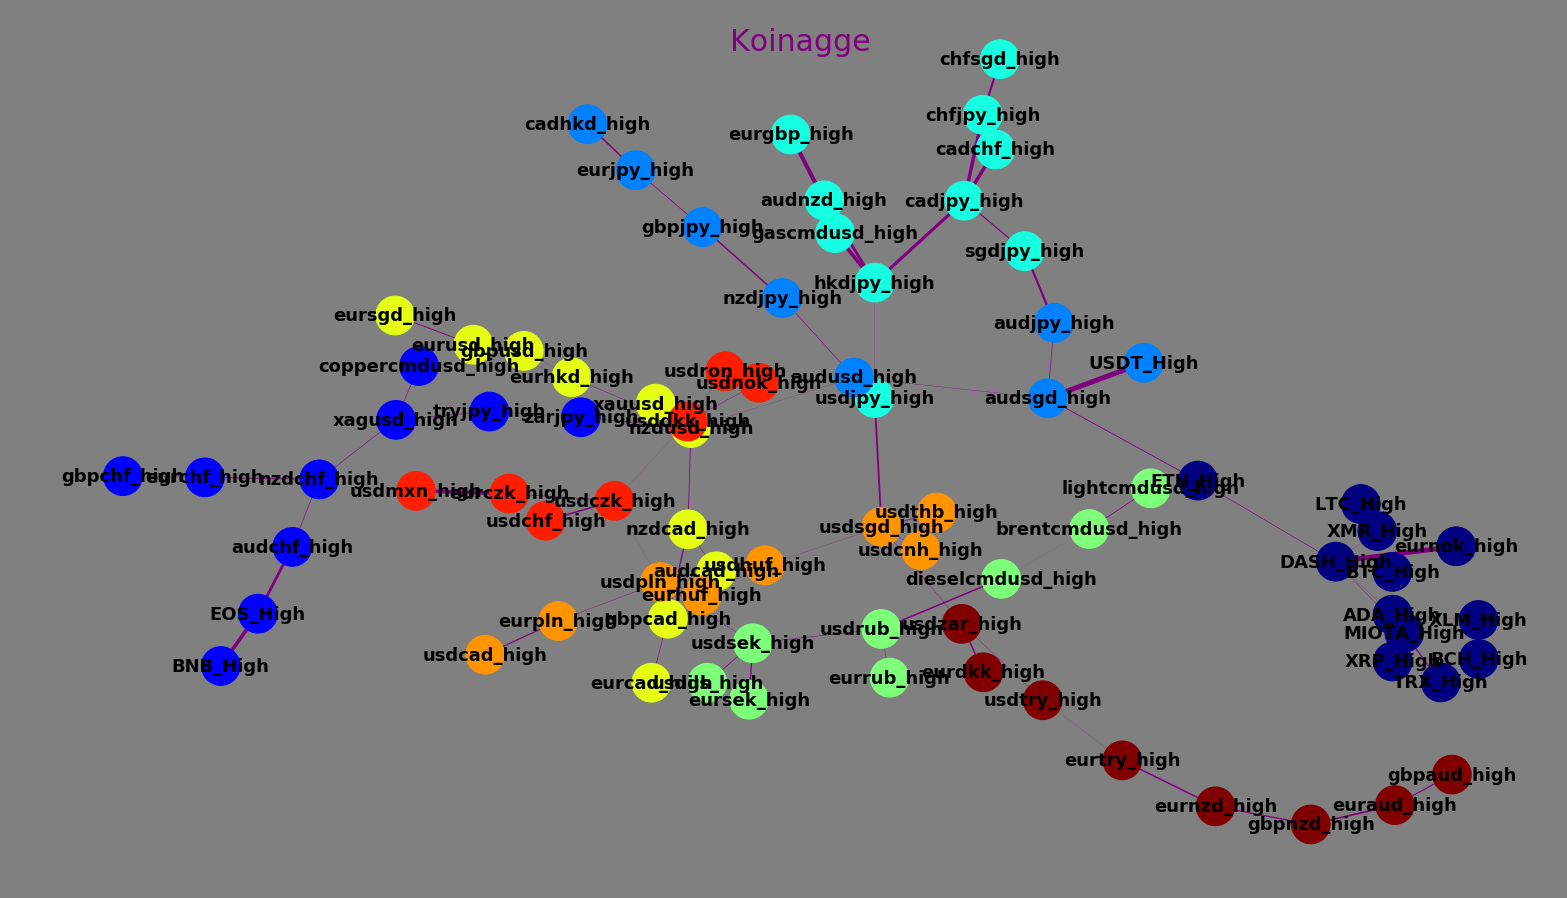

In [23]:
Draw_Louvain(G)